# INFO2950 Final Project Phase II

#### By Julianna Castlegrant (jgc254), Jillian Creighton (jcc429), and Matthew Roohan (mlr287)

In [277]:
## this code cell is also marked as 'narrative'
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import duckdb, sqlalchemy

from sklearn.linear_model import LogisticRegression

In [238]:
%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


## Research Question

The idea we are settling on is our Idea 1 from Phase I: Guiding Eyes for the Blind Puppy Raising Program for Blind People.
Our research questions are: What factors impact the ability to pass the final guide dog exam? Factors of interest include dam, sire, birthday, gender, breed, and region.

## Data Collection and Cleaning

#### Data Collection

Data was obtained from guidingeyes.org via the raiser access portal. This data is available for members of the Guiding Eyes for the Blind community and those who are approved to view. Matthew Roohan has access to this file as a Puppy Raiser. The data was pulled as a .pdf from guidingeyes.org. This document was then converted to a .csv file to use in the Jupyter notebook. Once converted, we noticed that there were additional rows added to the file due to an issue with data separation during the conversion. We fixed this issue by going into the settings and telling the cells not to separate on the basis of “ * “ and only “ , “. This produced a .csv file that was properly formatted with no more unwanted additional rows. This file was named alldogsreport1.csv. To help you visualize, we displayed alldogsreport1.csv below under the name all_dogs_df.

In [275]:
all_dogs_df = pd.read_csv("alldogsreport1.csv")
all_dogs_df.head()

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN


We would like to note that because this data is for the years 2020 and after, we scoured the internet to find this Guiding Eyes for the Blind data for years prior to 2020, but we could not find it because this data was removed when their site was updated. We then persistently reached out to multiple staff members of Guiding Eyes for the Blind via phone calls, text messages, and email. We contacted the organization's Regional Director of the Finger Lakes Region, numerous contacts through their Business Department, and even the Director of Canine Program Development. However, we were either told that they could not find the old data despite their efforts, or our attempts at communication were left unanswered. Even when we moved on to contacting every Guide Dog Training program whose headquarters was in New York and New Jersey (to potentially run a comparison of other guide dog organization success compared to Guiding Eyes for the Blind success), we were either sent to voicemail or we got no updates from the people we contacted. The point of mentioning this is to show the immense effort that went into collecting and expanding our Guiding Eyes data.

#### Data Cleaning

In order to correctly clean out data, we must first understand what we’re looking at. This is particularly important when it comes to the values of the 'Status' column because we can determine which dogs pass or fail based off of their status. The unqiue values of 'Status' are shown in the code below.

In [374]:
all_dogs_df['Status'].unique()

array(['Too Young to Test', 'Ready for Puppy Raiser', 'Released',
       'Puppy Raising', 'Other School', nan, 'In Training', 'Breed Eval',
       'Breeding', 'In Class', 'Graduated', 'Retired'], dtype=object)

The following are definitions for each unqiue value of Status:
- "Too Young to Test" = Dog was recently born and is too young to start any kind of training or testing
- "Ready for Puppy Raiser" = Dog is old enough and is waiting to be assigned to a Puppy Raiser to begin basic training (i.e. learning commands)
- "Puppy Raising" = Dog is currently in the process of training with their raiser but has taken no exam
- "Breed Eval" = Dog is being evaluated as a potential dog to breed
- "Breeding" = Dog is being used as a breeder dog and will not take the final exam
- "In Training" = Any dog who has passed their regional evaluation and is relocated to the Guide Dog School in Yorktown Heights, NY. These are dogs who are undergoing formal guide dog training, working towards the goal of “Graduated.”
- “Graduated” = Dog has passed the final test to become a working dog and will be matched with someone through the Guiding Eyes for the Blind dog waitlist
- "In Class" = Dog graduated, but has to tie up loose ends via a class before they can officially begin working
- "Graduated" = Dog graduated, was matched with someone, but has retired from duty
- “Other School” =  Dog has passed the final test to become a working dog but will be used in another form of a working dog outside of Guiding Eyes for the Blind. For example, as a bomb sniffing dog.
- “Released”= Dog has not passed their exam and has since been put up for adoption for the general public
- nan = Dog has no Status value

Another thing to note is any dog who has passed the final test and is matched with an owner who accompanies them at their graduation ceremony is given a graduation date, which is listed in the “Graduation Date” column. The code below sorts the dataframe by said column.

In [376]:
all_dogs_df.sort_values(by=['Graduation Date']).head(18)

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
1005,Wendy,2W20,Female,GS,B&T,3/18/2020,Luna - 3L316 - GSBF,Indy FGDF I28-5M - INDY FGDF - GSB&TM *NOP*,1/15/2022,Graduated,Westchester County Puppy Raising Region,1/15/2022,"South Dakota, Vermillion"
1125,Elana,2E+20,Female,LR,Y,1/12/2020,Yoshi - 1Y17 - LRYF,Oreo - 6O18 - LRBM,10/11/2021,Graduated,Northern CT Puppy Raising Region,10/11/2021,"Wisconsin, Milwaukee"
1042,Pilot,2P20,Male,GS,B&T,3/2/2020,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,2/14/2022,Graduated,Northern CT Puppy Raising Region,2/14/2022,"Vermont, Colchester"
942,Hobie,1HH20,Male,GS,B&T,5/3/2020,Shea - 5SS18 - GSBF,Cappy - S - 2C315 - GSB&TM,3/18/2022,Graduated,Central NY Puppy Raising Region,3/18/2022,"New York, Woodhaven"
1134,Drake,3D20,Male,LR,B,1/10/2020,Maya - 4MM15 - LRBF,Edgar - 1E315 - LRBM,4/22/2022,Graduated,Bay Puppy Raising Region,4/22/2022,"Minnesota, Richfield"
1092,Jaedah,3J20,Female,LR,Y,1/29/2020,Terri - 3T18 - LRBF,Charlie - 10CC17 - LRYM,5/18/2022,Graduated,Northern CT Puppy Raising Region,5/18/2022,"Texas, Dallas"
918,Lowell,3LL20,Male,LR,B,5/17/2020,Lava - 4L417 - LRBF,Ryan - 9RR17 - LRYM,5/3/2022,Graduated,Dominion Puppy Raising Region,5/3/2022,"Massachusetts, Brookline"
974,Derek,5DD20,Male,LR,B,4/12/2020,Quail - 6Q417 - LRBF,Ryan - 9RR17 - LRYM,5/7/2022,Graduated,Baltimore Puppy Raising Region,5/7/2022,"Oklahoma, Enid"
954,Fantasia,1FF20,Female,LR,Y,4/24/2020,Erin - P - 5E315 - LRCHOCF,Yarmouth - 2YY18 - LRYM,6/15/2022,Graduated,Rhode Island Puppy Raising Region,6/15/2022,"Indiana, Kokomo"
1139,Coach,4C20,Male,LR,Y,1/8/2020,Wheat - 8W317 - LRBF,Zinc - 8ZZ17 - LRYM,6/18/2022,Graduated,Cleveland East Puppy Raising Region,6/17/2022,"Wisconsin, Milwaukee"


By looking at the dataframe above, we found that there are four dogs whose status is not listed as “Graduated”, but they have a graduation date.
- Rooney (Tattoo 9R20) has a status of Retired, which means he did graduate and was matched with someone on 6/4/2022, but is now retired.
- Jason (Tattoo 1J20) has a status of “In Training”, which means that he did graduate and was matched with someone on 7/2/2022, but has to tie up loose ends with his training before he can officially be working.
- Nixie (Tattoo 2NN20) and Ulysses (Tattoo 3U20) have a status of “In Class”, which means that they did graduate on 9/23/2022, but has to tie up loose ends via a class before they can officially be working.

Therefore, knowing the context of the organization behind this data, we can and should classify these dogs as having the status of “Graduated”. For the purposes of running our analysis this point forward, we went into the csv file and manually switched the status of these four dogs from retired/in training/in-class to Graduated. We then saved this csv file as a new file titled 'alldogsreport-revised.csv', which is displayed below.

In [273]:
all_dogs_revised_df = pd.read_csv("alldogsreport-revised.csv")
all_dogs_revised_df.head()

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN


With that being said, we now have two statuses that indicate that a dog has successfully passed their exam to be a guide dog: “Graduated” and “Other School”. Therefore, we will create a column titled “Pass_Fail”, where dogs with a status of “Graduated” and “Other School” will be assigned the boolean value 1 meaning passed, and all other statuses will be assigned the boolean value 0 meaning failed. You can see this new column displayed in the dataframe below.

In [377]:
all_dogs_revised_df['Pass_Fail'] = (all_dogs_revised_df['Status'] == 'Graduated') | (all_dogs_revised_df['Status'] == 'Other School')
all_dogs_revised_df.head()

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Graduation Date,Graduate Team Location,Pass_Fail
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN,False
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN,False
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN,False
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN,False
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,NaN,NaN,False


Now with this current dataset, we find that there is no longer a use for the last two columns “Graduation Date” and “Graduation Team Location”. They include many NaN values, and the dates themselves are not relevant to the analysis we’d like to run, therefore we will remove them. This change is shown below in all_dogs_dropcol_df.

In [378]:
all_dogs_dropcol_df = all_dogs_revised_df.drop(columns = ['Graduation Date', 'Graduate Team Location'])
all_dogs_dropcol_df.head()

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
0,Everest,2E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,False
1,Ellie,4E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,False
2,Echo,5E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,False
3,Eclaire,6E322,Female,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,False
4,Elias,3E322,Male,LR,Y,9/12/2022,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,9/12/2022,Too Young to Test,NaN,False


In [241]:
all_dogs_dropcol_df = all_dogs_revised_df.drop(columns = ['Graduation Date', 'Graduate Team Location'])
all_dogs_dropcol_df['Birthdate'] = pd.to_datetime(all_dogs_dropcol_df['Birthdate'])
all_dogs_dropcol_df['Current Status Date'] = pd.to_datetime(all_dogs_dropcol_df['Current Status Date'])
all_dogs_dropcol_df
print(list(all_dogs_dropcol_df.columns))
all_dogs_dropcol_df.rename(columns = {'Sire ':'Sire'}, inplace=True)
print(list(all_dogs_dropcol_df.columns))

['Dog Name', 'Tattoo', 'Gender', 'Breed', 'Color', 'Birthdate', 'Dam', 'Sire ', 'Current Status Date', 'Status', 'Region', 'Pass_Fail']
['Dog Name', 'Tattoo', 'Gender', 'Breed', 'Color', 'Birthdate', 'Dam', 'Sire', 'Current Status Date', 'Status', 'Region', 'Pass_Fail']


In [242]:
clean_dogs_df = all_dogs_dropcol_df.loc[(all_dogs_dropcol_df['Status']=='Graduated') | (all_dogs_dropcol_df['Status']=='Released') | (all_dogs_dropcol_df['Status']=='Other School')]
#clean_dogs_df.head(100)
#clean_dogs_df.loc['Released']
#display(clean_dogs_df)
display(clean_dogs_df.loc[[1021]])

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
1021,Rooney,9R20,Male,LR,Y,2020-03-07,Tiara - 6TT15 - LRBF,Kisco - 6KK18 - LRYM,2022-09-01,Graduated,Monroe NY Puppy Raising Region,True


In [243]:
clean_dogs_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
76,Priscilla,5PP22,Female,LR,B,2022-07-19,Zelda - 1Z319 - LRBF,Gerald - 7G20 - LRYM,2022-09-12,Released,NaN,False
80,Nana,4NN22,Female,LR,B,2022-07-05,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,2022-08-29,Released,NaN,False
84,Nifty,5NN22,Female,LR,B,2022-07-05,Madeline - 7M20 - LRYF,Odin - 5OO19 - LRBM,2022-08-29,Released,NaN,False
90,Moana (Dugan),1MM22,Female,LR,B,2022-07-02,Dawn - 1DD20 - LRYF,Dover - 3D19 - LRBM,2022-08-25,Released,NaN,False
95,Leone,2LL22,Male,LR,B,2022-06-21,Via - 6VV18 - LRBF,Elrod - 6E319 - LRBM,2022-08-15,Released,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1148,Brittany,7B20,Female,LR,Y,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2020-03-03,Released,NaN,False
1149,Bramble,8B20,Male,LR,Y,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2022-02-22,Released,Prince William Puppy Raising Region,False
1151,Barney,10B20,Male,LR,Y,2020-01-07,Lark - 4L18 - LRBF,Finn - 7F315 - LRYM,2021-05-27,Released,Dominion Puppy Raising Region,False
1152,Amos (Noche),1A20,Male,LR,B,2020-01-06,Wanda - S - 2WW15 - LRBF,Joe - 4JJ13 - LRBM,2020-03-04,Released,NaN,False


We purposefully chose not to reset index in the new dataframe in order to standardize the index across all dataframes. For example, Priscilla is index 76 in both clean_dogs_df and all_dogs_revised_df. In code, this would mean that print(*insert df name here*['Dog Name'][76]) would always output 'Priscilla'. Maintaining consistency seems like the most logical route at the moment.

In [244]:
clean_dogs_df.to_csv('clean_dog_data.csv')

In [245]:
all_dogs_revised_df['Status'].unique()

array(['Too Young to Test', 'Ready for Puppy Raiser', 'Released',
       'Puppy Raising', 'Other School', nan, 'In Training', 'Breed Eval',
       'Breeding', 'Graduated'], dtype=object)

Starting to create df for those who have not been testsed (Puppy Raising)- Data to run model on:  

In [246]:
dogs_to_predict_df = all_dogs_dropcol_df.loc[(all_dogs_dropcol_df['Status']=='Too Young to Test') | (all_dogs_dropcol_df['Status']=='Ready for Puppy Raiser') | (all_dogs_dropcol_df['Status']=='Puppy Raising')  | (all_dogs_dropcol_df['Status']=='In Training')]
#dogs_to_predict_df['Birthdate'] = pd.to_datetime(dogs_to_predict_df['Birthdate'])
dogs_to_predict_df = dogs_to_predict_df.drop(columns = ['Pass_Fail'])
dogs_to_predict_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region
0,Everest,2E322,Male,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
1,Ellie,4E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
2,Echo,5E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
3,Eclaire,6E322,Female,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
4,Elias,3E322,Male,LR,Y,2022-09-12,Locket - 10L318 - LRBF,Everett - 1E419 - LRYM,2022-09-12,Too Young to Test,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1114,Fernando,4F20,Male,LR,B,2020-01-23,Winter - 1W18 - LRBF,Ryan - 9RR17 - LRYM,2022-02-15,In Training,Maine Puppy Raising Region
1121,Gabe,4G20,Male,LR,Y,2020-01-23,MacKenzie - S - 2M18 - LRYF,Jasper - 4JJ17 - LRYM,2022-03-15,In Training,Erie NY Puppy Raising Region
1123,Gregg,6G20,Male,LR,Y,2020-01-23,MacKenzie - S - 2M18 - LRYF,Jasper - 4JJ17 - LRYM,2022-02-15,In Training,Bay Puppy Raising Region
1132,Denali,2D20,Male,LR,Y,2020-01-10,Maya - 4MM15 - LRBF,Edgar - 1E315 - LRBM,2022-02-15,In Training,Richmond Puppy Raising Region


In [247]:
dogs_to_predict_df.to_csv('predict_dog_data.csv')

Data Description: 

Exploratory Data Analysis

In [248]:
clean_dogs_df[['Current Status Date', 'Pass_Fail']].groupby(clean_dogs_df['Current Status Date'].dt.year).sum()

,Pass_Fail
Current Status Date,
2020,8
2021,28
2022,103


In [249]:
pass_dogs_df = clean_dogs_df.loc[(all_dogs_dropcol_df['Pass_Fail']==1)]
pass_dogs_df['Gender'].value_counts()

Male      72
Female    67
Name: Gender, dtype: int64

In [250]:
pass_dogs_df

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail
101,Keoki (Kaelynn),9KK22,Female,GS,B&T,2022-06-18,Mittzy - 2M318 - GSB&TF,Usher TSE - USHER - GSB&TM *NOP*,2022-08-17,Other School,NaN,True
104,Kiara (Kara),2KK22,Female,GS,B&T,2022-06-18,Mittzy - 2M318 - GSB&TF,Usher TSE - USHER - GSB&TM *NOP*,2022-08-17,Other School,NaN,True
115,Puppy 4,4N01263,Male,LR,Y,2022-06-13,Ulani (Shanna) - 6UU20 - LRYF *NOP*,Garcia - 4G16 - LRYM,2022-06-16,Other School,NaN,True
116,Puppy 7,7N01263,Female,LR,Y,2022-06-13,Ulani (Shanna) - 6UU20 - LRYF *NOP*,Garcia - 4G16 - LRYM,2022-06-16,Other School,NaN,True
117,Puppy 8,8N01263,Male,LR,Y,2022-06-13,Ulani (Shanna) - 6UU20 - LRYF *NOP*,Garcia - 4G16 - LRYM,2022-06-16,Other School,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,Jaedah,3J20,Female,LR,Y,2020-01-29,Terri - 3T18 - LRBF,Charlie - 10CC17 - LRYM,2022-05-18,Graduated,Northern CT Puppy Raising Region,True
1125,Elana,2E+20,Female,LR,Y,2020-01-12,Yoshi - 1Y17 - LRYF,Oreo - 6O18 - LRBM,2021-10-11,Graduated,Northern CT Puppy Raising Region,True
1134,Drake,3D20,Male,LR,B,2020-01-10,Maya - 4MM15 - LRBF,Edgar - 1E315 - LRBM,2022-04-22,Graduated,Bay Puppy Raising Region,True
1136,Clara PBB,CLARA PBB,Female,LR,B,2020-01-09,NaN,NaN,2021-05-06,Other School,NaN,True


In [251]:
pass_dogs_df['Dam'].value_counts()

Dakota - S - 4D417 - LRBF *NOP*               10
Ulani (Shanna) - 6UU20 - LRYF *NOP*            9
Breeze - 9B319 - LRYF *NOP*                    9
Capri - 2C17 - LRBF                            8
Sabrina (Charity 2041) - 8S20 - LRBF *NOP*     8
Yahtzee FGDF - YAHTZEE - GSBF *NOP*            8
Bettina - 10B317 - LRYF *NOP*                  6
Frannie - 2FF17 - LRBF                         6
Fortune - 4F318 - LRYF                         5
Noni - 2N18 - LRBF                             4
Roz - 4RR18 - LRBF                             3
Mittzy - 2M318 - GSB&TF                        3
Caprice - 8C318 - LRBF                         3
Patrice - 6P319 - LRBF                         3
Oriole - 9O316 - LRYF                          2
Luna - 3L316 - GSBF                            2
Fauna FGDF F28-6F - FAUNA - GSSABLF *NOP*      2
Shea - 5SS18 - GSBF                            2
Dusk - 7D418 - LRBF                            2
Jenny - 1JJ18 - GSB&TF                         2
Emery - 4E19 - GSB&T

In [252]:
pass_dogs_df['Dam'].value_counts() / len(pass_dogs_df)

Dakota - S - 4D417 - LRBF *NOP*               0.071942
Ulani (Shanna) - 6UU20 - LRYF *NOP*           0.064748
Breeze - 9B319 - LRYF *NOP*                   0.064748
Capri - 2C17 - LRBF                           0.057554
Sabrina (Charity 2041) - 8S20 - LRBF *NOP*    0.057554
Yahtzee FGDF - YAHTZEE - GSBF *NOP*           0.057554
Bettina - 10B317 - LRYF *NOP*                 0.043165
Frannie - 2FF17 - LRBF                        0.043165
Fortune - 4F318 - LRYF                        0.035971
Noni - 2N18 - LRBF                            0.028777
Roz - 4RR18 - LRBF                            0.021583
Mittzy - 2M318 - GSB&TF                       0.021583
Caprice - 8C318 - LRBF                        0.021583
Patrice - 6P319 - LRBF                        0.021583
Oriole - 9O316 - LRYF                         0.014388
Luna - 3L316 - GSBF                           0.014388
Fauna FGDF F28-6F - FAUNA - GSSABLF *NOP*     0.014388
Shea - 5SS18 - GSBF                           0.014388
Dusk - 7D4

In [253]:
pass_dogs_df['Dam'].value_counts()

Dakota - S - 4D417 - LRBF *NOP*               10
Ulani (Shanna) - 6UU20 - LRYF *NOP*            9
Breeze - 9B319 - LRYF *NOP*                    9
Capri - 2C17 - LRBF                            8
Sabrina (Charity 2041) - 8S20 - LRBF *NOP*     8
Yahtzee FGDF - YAHTZEE - GSBF *NOP*            8
Bettina - 10B317 - LRYF *NOP*                  6
Frannie - 2FF17 - LRBF                         6
Fortune - 4F318 - LRYF                         5
Noni - 2N18 - LRBF                             4
Roz - 4RR18 - LRBF                             3
Mittzy - 2M318 - GSB&TF                        3
Caprice - 8C318 - LRBF                         3
Patrice - 6P319 - LRBF                         3
Oriole - 9O316 - LRYF                          2
Luna - 3L316 - GSBF                            2
Fauna FGDF F28-6F - FAUNA - GSSABLF *NOP*      2
Shea - 5SS18 - GSBF                            2
Dusk - 7D418 - LRBF                            2
Jenny - 1JJ18 - GSB&TF                         2
Emery - 4E19 - GSB&T

In [317]:
pd.crosstab(index=pass_dogs_df['Dam'], columns='count')

col_0,count
Dam,
Alibi - 2A416 - LRBF,1
Bettina - 10B317 - LRYF *NOP*,6
Breeze - 9B319 - LRYF *NOP*,9
Brio - S - 6B319 - LRYF,2
Buttons - 4B19 - LRYF,1
CYPRUSFGDF - GSB&TF *NOP*,1
Capri - 2C17 - LRBF,8
Caprice - 8C318 - LRBF,3
Dakota - S - 4D417 - LRBF *NOP*,10


In [255]:
pd.crosstab(index=pass_dogs_df['Dam'], columns=pass_dogs_df['Gender'])

Gender,Female,Male
Dam,,
Alibi - 2A416 - LRBF,1,0
Bettina - 10B317 - LRYF *NOP*,3,3
Breeze - 9B319 - LRYF *NOP*,5,4
Brio - S - 6B319 - LRYF,0,2
Buttons - 4B19 - LRYF,1,0
CYPRUSFGDF - GSB&TF *NOP*,1,0
Capri - 2C17 - LRBF,2,6
Caprice - 8C318 - LRBF,3,0
Dakota - S - 4D417 - LRBF *NOP*,4,6


In [292]:
pd.crosstab(index=clean_dogs_df['Gender'], columns=clean_dogs_df['Pass_Fail'])

Pass_Fail,False,True
Gender,,
Female,167,67
Male,168,72


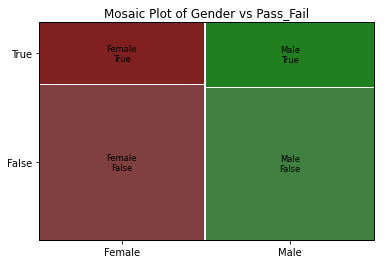

In [291]:
mosaic(clean_dogs_df, ['Gender', 'Pass_Fail'], title = 'Mosaic Plot of Gender vs Pass_Fail')
plt.show()

In [296]:
pd.crosstab(index=clean_dogs_df['Breed'], columns=clean_dogs_df['Pass_Fail'])

Pass_Fail,False,True
Breed,,
GS,24,24
LR,311,115


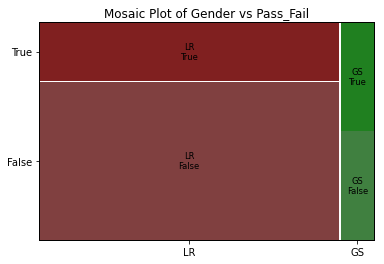

In [297]:
mosaic(clean_dogs_df, ['Breed', 'Pass_Fail'], title = 'Mosaic Plot of Gender vs Pass_Fail')
plt.show()

[Text(0, 0, '0.286325'), Text(0, 0, '0.3')]

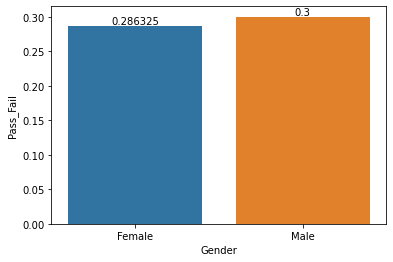

In [309]:
gender_barplot = sns.barplot(x='Gender', y='Pass_Fail', data=clean_dogs_df, ci=None)
gender_barplot.bar_label(gender_barplot.containers[0])

<function matplotlib.pyplot.show(close=None, block=None)>

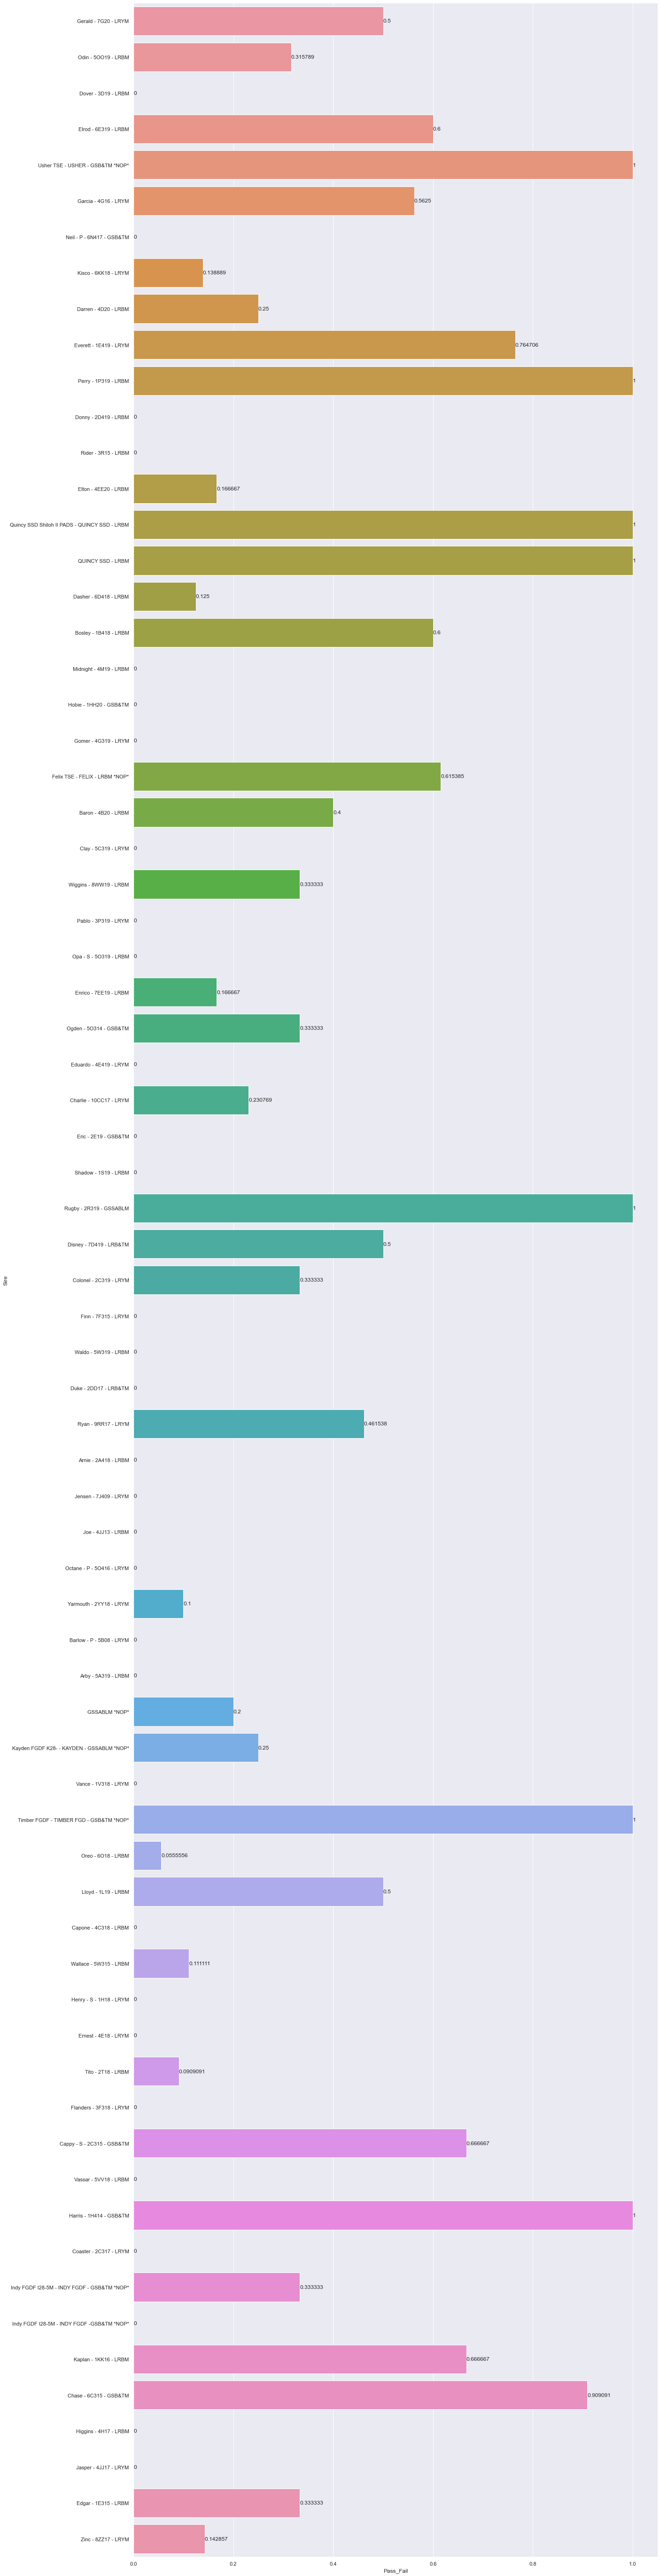

In [346]:
sire_barplot = sns.barplot(x="Pass_Fail", y='Sire', data=clean_dogs_df, ci=None)
#plt.figure(figsize=(300,100))
sire_barplot.bar_label(sire_barplot.containers[0])
sns.set(rc={"figure.figsize":(20, 50)})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

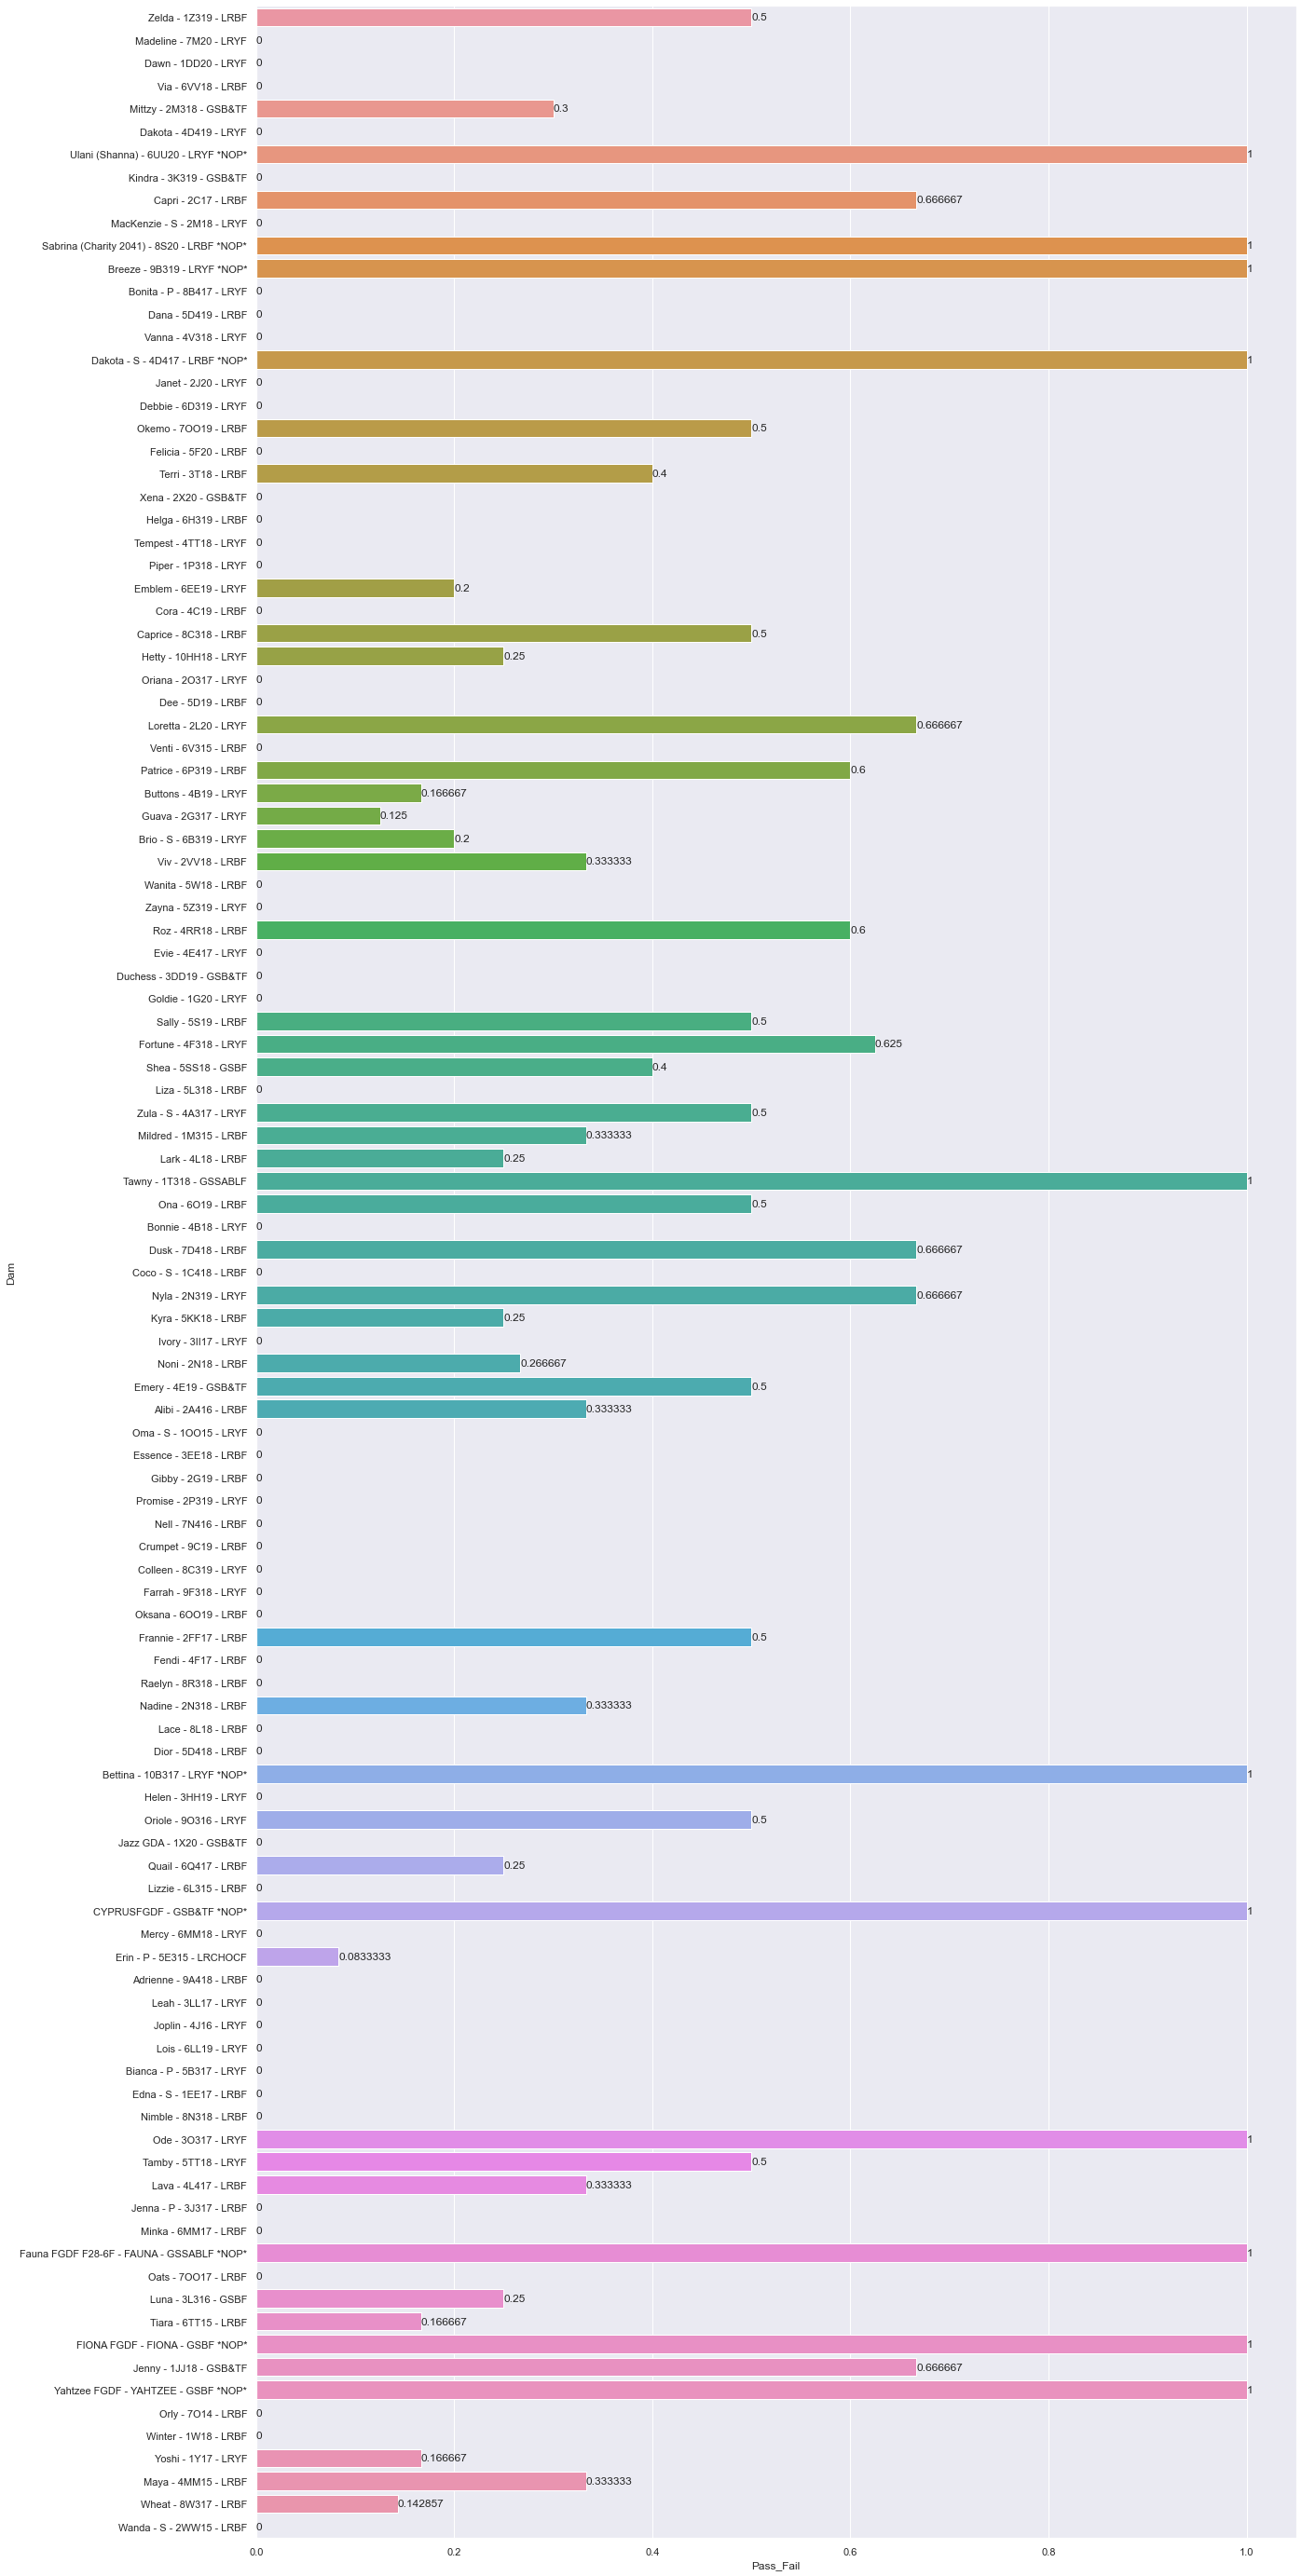

In [358]:
dam_barplot = sns.barplot(x="Pass_Fail", y='Dam', data=clean_dogs_df, ci=None)
dam_barplot.bar_label(dam_barplot.containers[0])
sns.set(rc={"figure.figsize":(20, 50)})
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

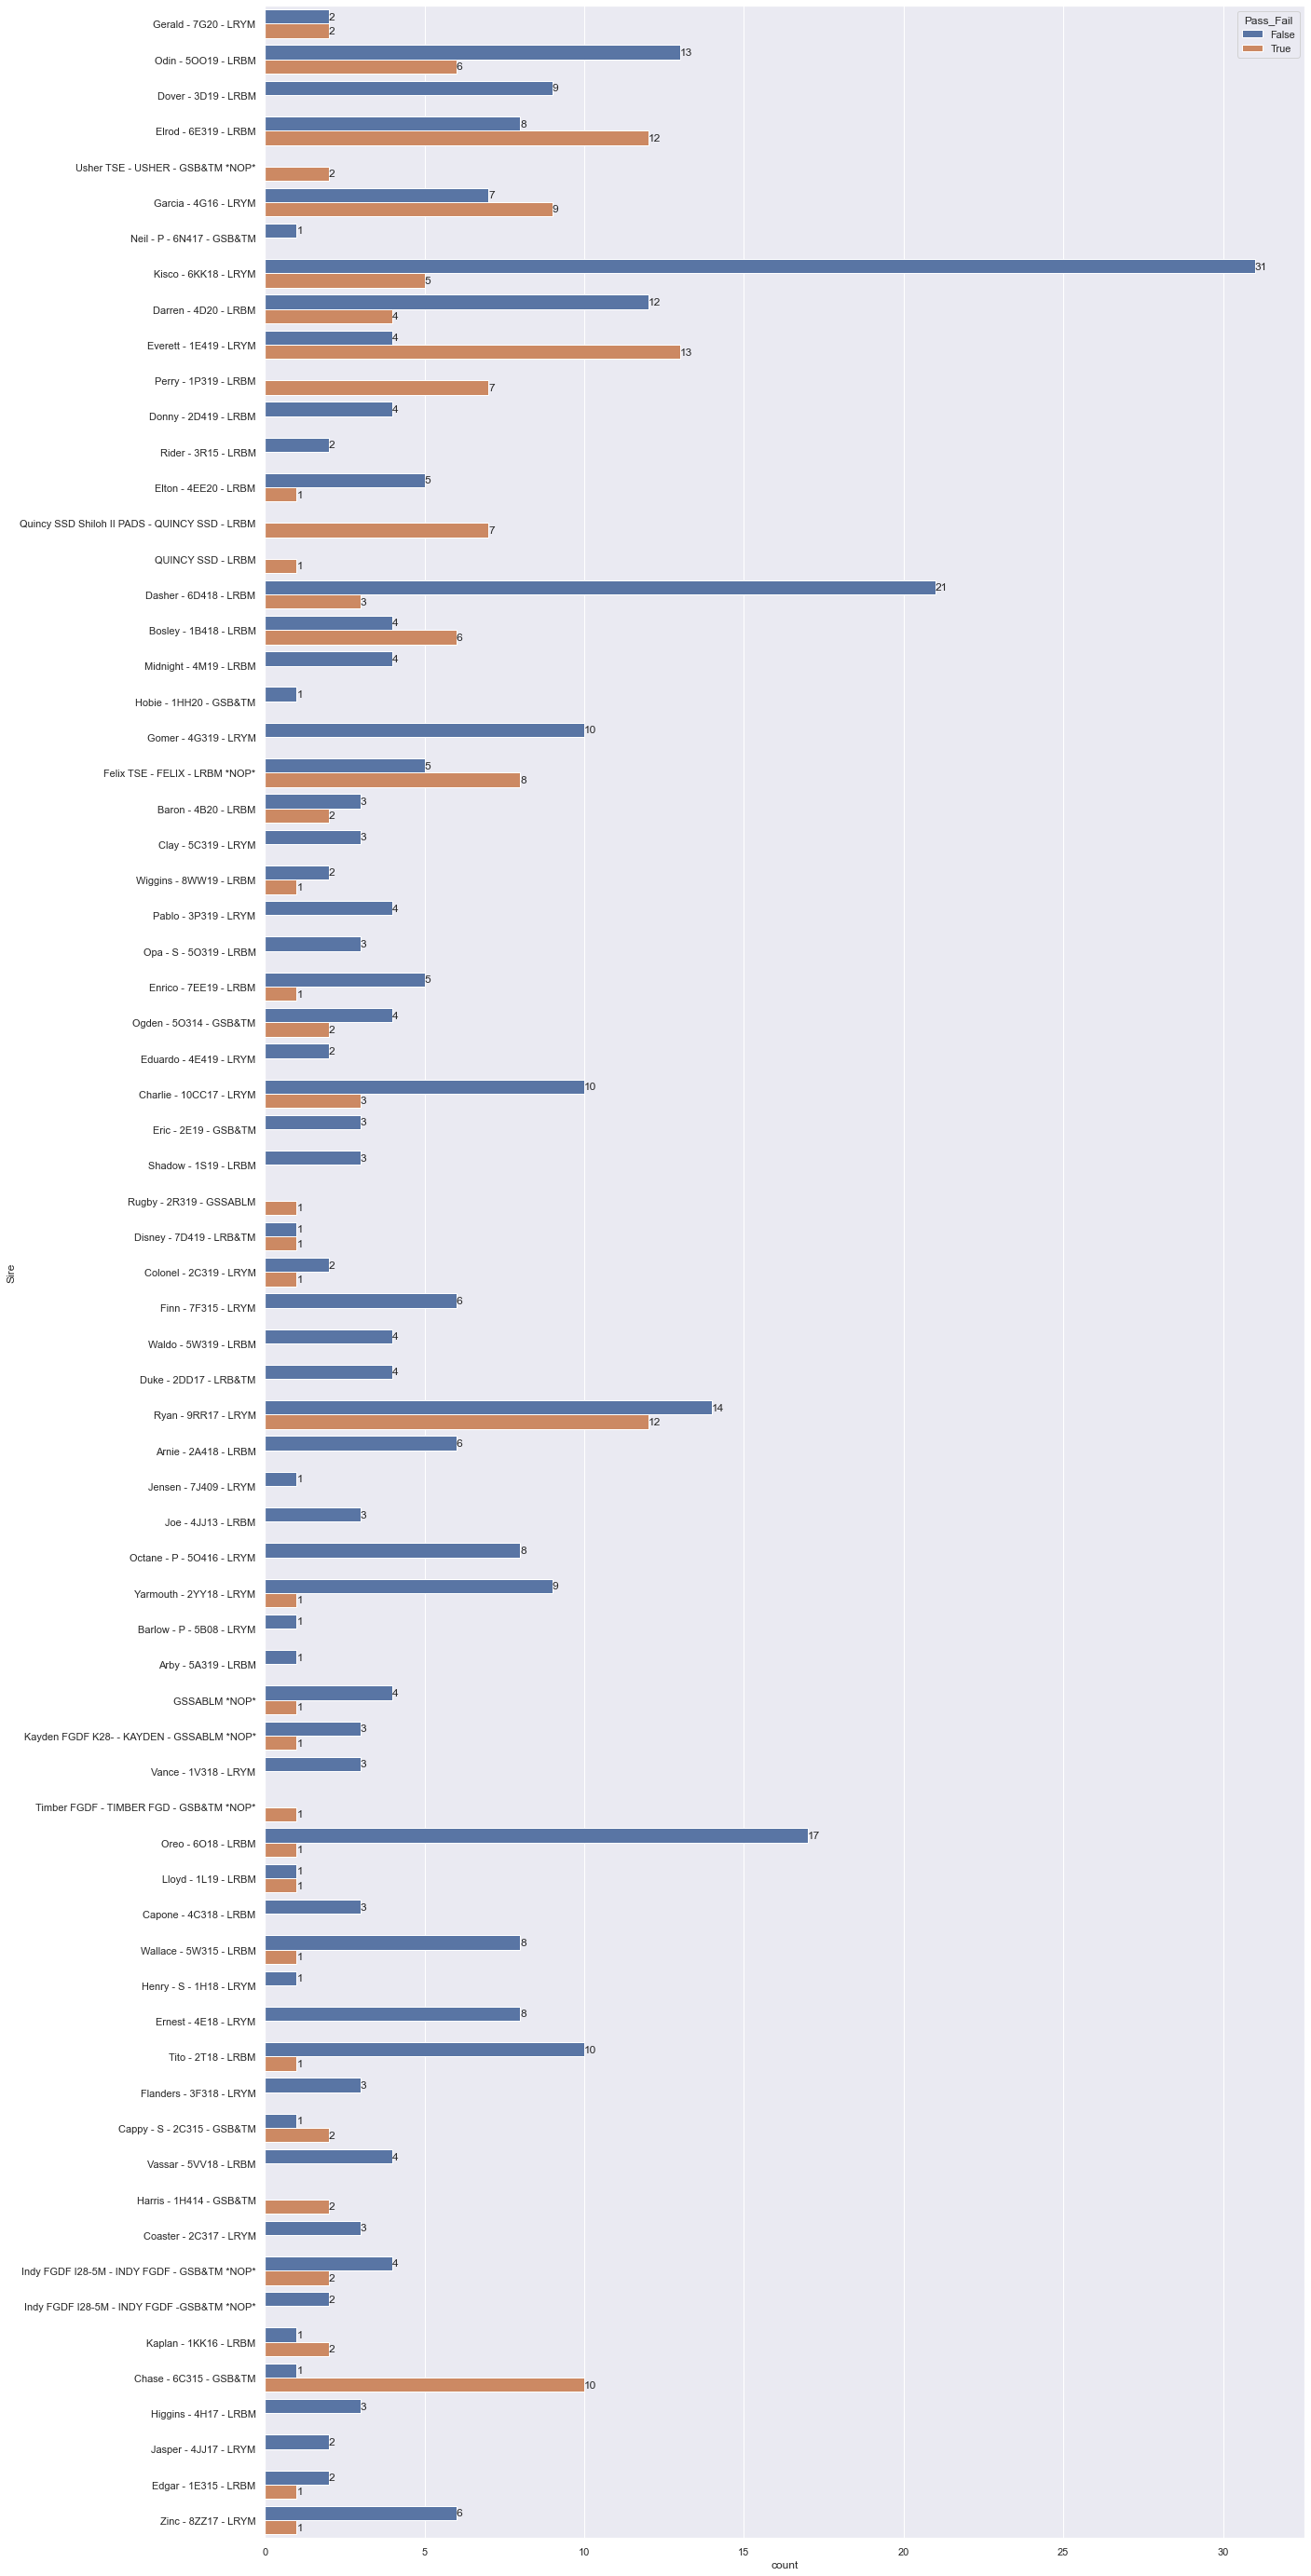

In [355]:
sire_countplot = sns.countplot(data=clean_dogs_df, y='Sire', hue="Pass_Fail")
sire_countplot.bar_label(sire_countplot.containers[0])
sire_countplot.bar_label(sire_countplot.containers[1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

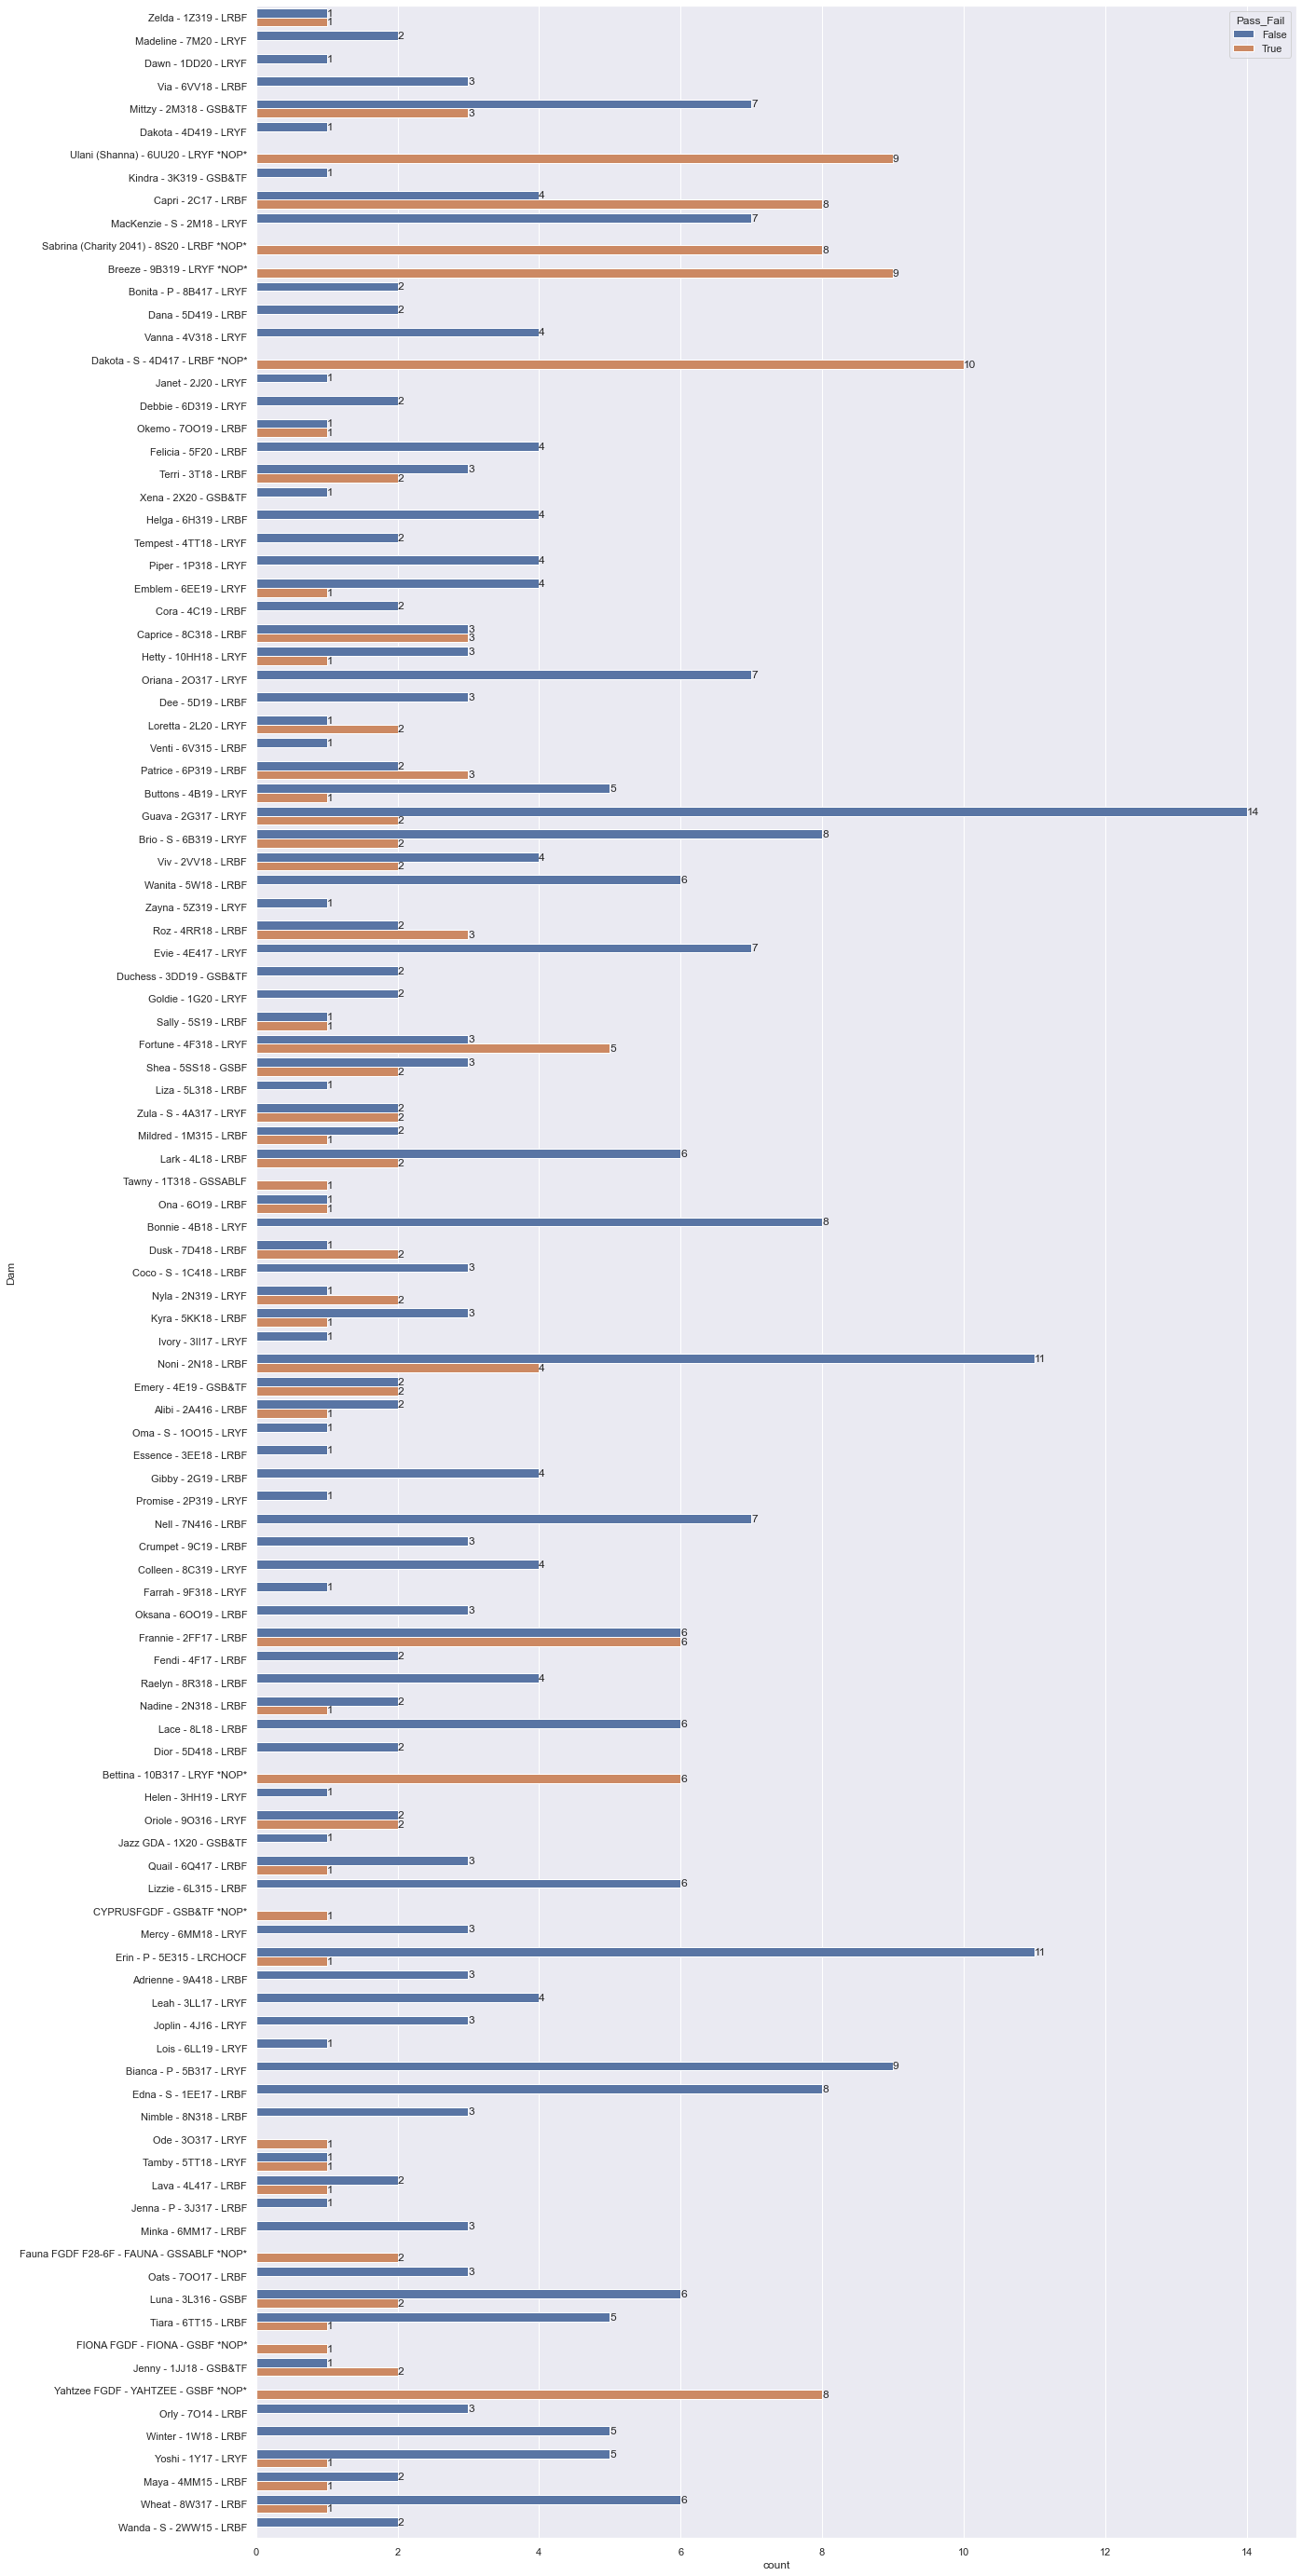

In [356]:
dam_countplot = sns.countplot(data=clean_dogs_df, y='Dam', hue="Pass_Fail")
dam_countplot.bar_label(dam_countplot.containers[0])
dam_countplot.bar_label(dam_countplot.containers[1])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

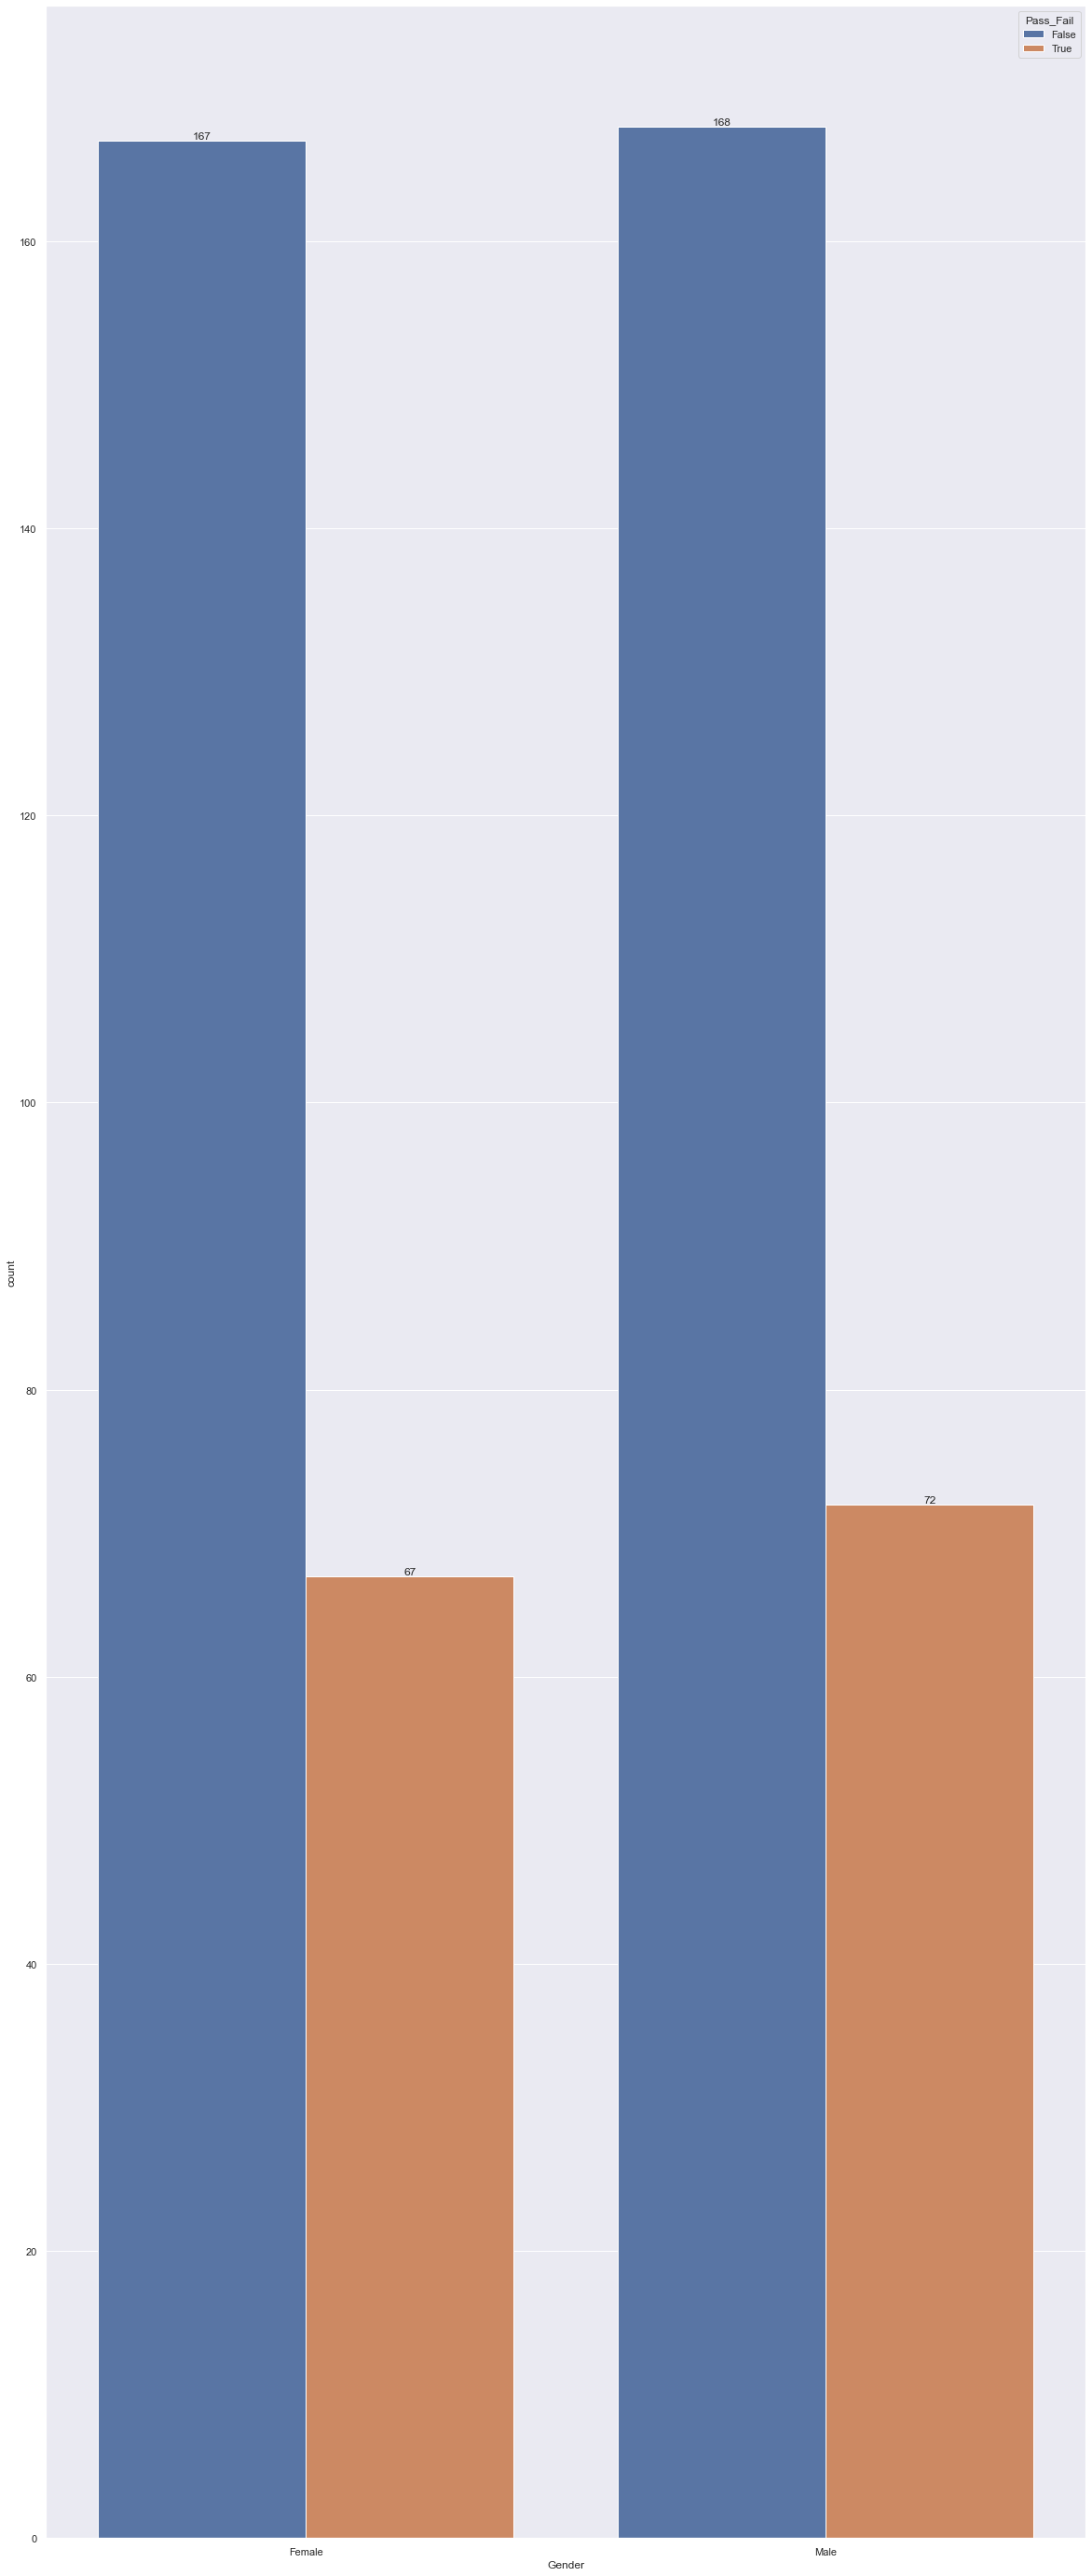

In [360]:
gender_countplot = sns.countplot(data=clean_dogs_df, x='Gender', hue="Pass_Fail")
gender_countplot.bar_label(gender_countplot.containers[0])
gender_countplot.bar_label(gender_countplot.containers[1])
plt.show

In [373]:
pd.crosstab(index=clean_dogs_df['Sire'], columns=clean_dogs_df['Pass_Fail'])

Pass_Fail,False,True
Sire,,
Arby - 5A319 - LRBM,1,0
Arnie - 2A418 - LRBM,6,0
Barlow - P - 5B08 - LRYM,1,0
Baron - 4B20 - LRBM,3,2
Bosley - 1B418 - LRBM,4,6
...,...,...
Waldo - 5W319 - LRBM,4,0
Wallace - 5W315 - LRBM,8,1
Wiggins - 8WW19 - LRBM,2,1


In [366]:
pd.crosstab(index=clean_dogs_df['Sire'], columns=clean_dogs_df['Pass_Fail'], normalize='index')

Pass_Fail,False,True
Sire,,
Arby - 5A319 - LRBM,1.000000,0.000000
Arnie - 2A418 - LRBM,1.000000,0.000000
Barlow - P - 5B08 - LRYM,1.000000,0.000000
Baron - 4B20 - LRBM,0.600000,0.400000
Bosley - 1B418 - LRBM,0.400000,0.600000
...,...,...
Waldo - 5W319 - LRBM,1.000000,0.000000
Wallace - 5W315 - LRBM,0.888889,0.111111
Wiggins - 8WW19 - LRBM,0.666667,0.333333


In [367]:
clean_dogs_df['Sire'].value_counts()

Kisco - 6KK18 - LRYM                       36
Ryan - 9RR17 - LRYM                        26
Dasher - 6D418 - LRBM                      24
Elrod - 6E319 - LRBM                       20
Odin - 5OO19 - LRBM                        19
                                           ..
Timber FGDF - TIMBER FGD - GSB&TM *NOP*     1
Rugby - 2R319 - GSSABLM                     1
Barlow - P - 5B08 - LRYM                    1
QUINCY SSD - LRBM                           1
Jensen - 7J409 - LRYM                       1
Name: Sire, Length: 71, dtype: int64

In [361]:
clean_dogs_df['Dam'].value_counts()

Guava - 2G317 - LRYF          16
Noni - 2N18 - LRBF            15
Erin - P - 5E315 - LRCHOCF    12
Capri - 2C17 - LRBF           12
Frannie - 2FF17 - LRBF        12
                              ..
Helen - 3HH19 - LRYF           1
Ode - 3O317 - LRYF             1
Ivory - 3II17 - LRYF           1
Liza - 5L318 - LRBF            1
CYPRUSFGDF - GSB&TF *NOP*      1
Name: Dam, Length: 111, dtype: int64

In [362]:
pd.crosstab(index=clean_dogs_df['Dam'], columns=clean_dogs_df['Pass_Fail'])

Pass_Fail,False,True
Dam,,
Adrienne - 9A418 - LRBF,3,0
Alibi - 2A416 - LRBF,2,1
Bettina - 10B317 - LRYF *NOP*,0,6
Bianca - P - 5B317 - LRYF,9,0
Bonita - P - 8B417 - LRYF,2,0
...,...,...
Yahtzee FGDF - YAHTZEE - GSBF *NOP*,0,8
Yoshi - 1Y17 - LRYF,5,1
Zayna - 5Z319 - LRYF,1,0


(array([18322., 18353., 18383., 18414., 18444., 18475., 18506., 18536.,
        18567., 18597., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

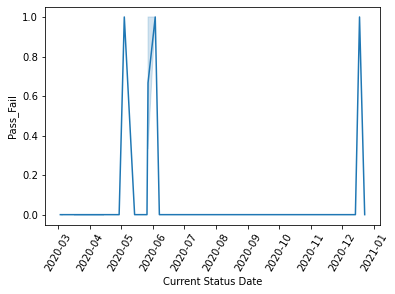

In [259]:
clean_dogs_2020_df = clean_dogs_df.loc[clean_dogs_df['Current Status Date'].dt.year == 2020]
clean_dogs_2020_df
seaborn.lineplot(data=clean_dogs_2020_df, x='Current Status Date', y='Pass_Fail')
plt.xticks(rotation = 60)

(array([18628., 18687., 18748., 18809., 18871., 18932., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

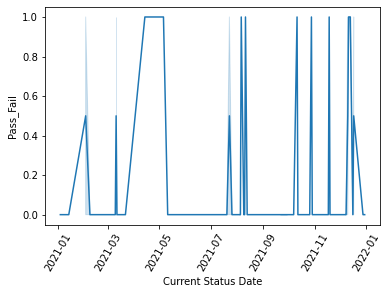

In [260]:
clean_dogs_2021_df = clean_dogs_df.loc[clean_dogs_df['Current Status Date'].dt.year == 2021]
clean_dogs_2021_df
seaborn.lineplot(data=clean_dogs_2021_df, x='Current Status Date', y='Pass_Fail')
plt.xticks(rotation = 60)

(array([18993., 19024., 19052., 19083., 19113., 19144., 19174., 19205.,
        19236.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

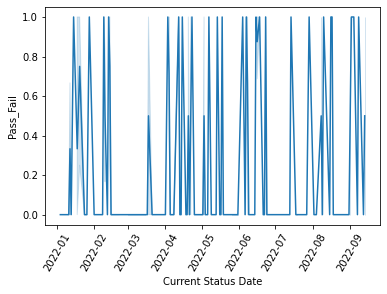

In [261]:
clean_dogs_2022_df = clean_dogs_df.loc[clean_dogs_df['Current Status Date'].dt.year == 2022]
clean_dogs_2022_df
seaborn.lineplot(data=clean_dogs_2022_df, x='Current Status Date', y='Pass_Fail')
plt.xticks(rotation = 60)

(array([18262., 18322., 18383., 18444., 18506., 18567., 18628.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

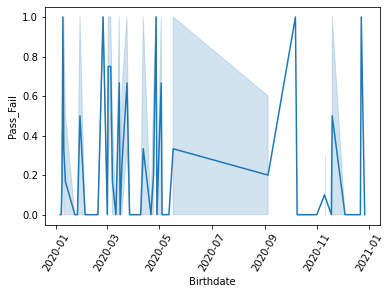

In [301]:
birthdate_2020_df = clean_dogs_df.loc[clean_dogs_df['Birthdate'].dt.year == 2020]
birthdate_2020_df
seaborn.lineplot(data=birthdate_2020_df, x='Birthdate', y='Pass_Fail')
plt.xticks(rotation = 60)

(array([18628., 18687., 18748., 18809., 18871., 18932., 18993.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

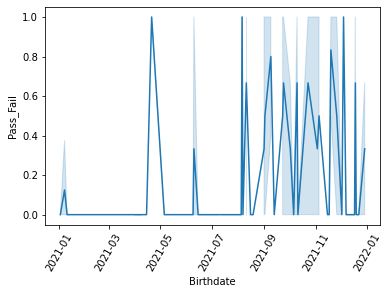

In [302]:
birthdate_2021_df = clean_dogs_df.loc[clean_dogs_df['Birthdate'].dt.year == 2021]
birthdate_2021_df
seaborn.lineplot(data=birthdate_2021_df, x='Birthdate', y='Pass_Fail')
plt.xticks(rotation = 60)

In [262]:
gender_dummy = pd.get_dummies(clean_dogs_df['Gender'], drop_first=True)
#X = pd.concat([X, gender_dummy], axis=1)
gender_dummy

,Male
76,0
80,0
84,0
90,0
95,1
...,...
1148,0
1149,1
1151,1
1152,1


In [263]:
#X = wfh_congress_df['biden'].values.reshape(-1, 1)
#y = wfh_congress_df['party'].values
#regression = LogisticRegression().fit(X, y)
#print('coefficient is ' +str(regression.coef_[0][0]))
#print('intercept is ' +str(regression.intercept_[0]))

#clean_dogs_df

X = gender_dummy['Male'].values.reshape(-1, 1)
y = clean_dogs_df['Pass_Fail'].values
regression = LogisticRegression().fit(X, y)
print('coefficient is ' +str(regression.coef_[0][0]))
print('intercept is ' +str(regression.intercept_[0]))

coefficient is 0.0634257457335823
intercept is -0.9119797537670922


In [264]:
passfail_prediction = regression.predict_proba(X)[:,1]
passfail_prediction
gender_dummy['passfail_prediction'] = passfail_prediction
gender_dummy

,Male,passfail_prediction
76,0,0.286595
80,0,0.286595
84,0,0.286595
90,0,0.286595
95,1,0.299736
...,...,...
1148,0,0.286595
1149,1,0.299736
1151,1,0.299736
1152,1,0.299736


In [265]:
sire_dummy = pd.get_dummies(clean_dogs_df['Sire'], drop_first=True)
#X = pd.concat([X, gender_dummy], axis=1)
sire_dummy

,Arnie - 2A418 - LRBM,Barlow - P - 5B08 - LRYM,Baron - 4B20 - LRBM,Bosley - 1B418 - LRBM,Capone - 4C318 - LRBM,Cappy - S - 2C315 - GSB&TM,Charlie - 10CC17 - LRYM,Chase - 6C315 - GSB&TM,Clay - 5C319 - LRYM,Coaster - 2C317 - LRYM,...,Timber FGDF - TIMBER FGD - GSB&TM *NOP*,Tito - 2T18 - LRBM,Usher TSE - USHER - GSB&TM *NOP*,Vance - 1V318 - LRYM,Vassar - 5VV18 - LRBM,Waldo - 5W319 - LRBM,Wallace - 5W315 - LRBM,Wiggins - 8WW19 - LRBM,Yarmouth - 2YY18 - LRYM,Zinc - 8ZZ17 - LRYM
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1149,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1151,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
X = sire_dummy
y = clean_dogs_df['Pass_Fail'].values
regression = LogisticRegression().fit(X, y)
print('coefficient is ' +str(regression.coef_[0][0]))
print('intercept is ' +str(regression.intercept_[0]))

coefficient is -0.792846911982109
intercept is -1.0891955722958468


In [267]:
passfail_prediction = regression.predict_proba(X)[:,1]
passfail_prediction
clean_dogs_copy_df = clean_dogs_df
clean_dogs_copy_df['passfail_prediction'] = passfail_prediction
clean_dogs_copy_df.sort_values(by=['passfail_prediction'], ascending=True)

/var/folders/ng/6ksz0qwd1pb753d654d5w_hc0000gn/T/ipykernel_18239/2710069931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_dogs_copy_df['passfail_prediction'] = passfail_prediction


,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,Pass_Fail,passfail_prediction
267,Mocha,3M22,Female,LR,B,2022-02-27,Cora - 4C19 - LRBF,Gomer - 4G319 - LRYM,2022-04-22,Released,NaN,False,0.105176
249,Parsley,9P22,Female,LR,Y,2022-03-17,Tempest - 4TT18 - LRYF,Gomer - 4G319 - LRYM,2022-05-16,Released,NaN,False,0.105176
247,Pongo,4P22,Male,LR,Y,2022-03-17,Tempest - 4TT18 - LRYF,Gomer - 4G319 - LRYM,2022-05-25,Released,NaN,False,0.105176
609,Fiesta (Rosina),7FF21,Female,LR,B,2021-07-02,Oksana - 6OO19 - LRBF,Gomer - 4G319 - LRYM,2021-08-27,Released,NaN,False,0.105176
607,Fancy (Willow),5FF21,Female,LR,B,2021-07-02,Oksana - 6OO19 - LRBF,Gomer - 4G319 - LRYM,2021-08-26,Released,NaN,False,0.105176
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,Dani (Diya) FGDF D29-4F,1N01269,Female,GS,B&T,2020-02-25,Yahtzee FGDF - YAHTZEE - GSBF *NOP*,Chase - 6C315 - GSB&TM,2022-09-08,Other School,NaN,True,0.722878
1042,Pilot,2P20,Male,GS,B&T,2020-03-02,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,2022-02-14,Graduated,Northern CT Puppy Raising Region,True,0.722878
1041,Petra (Maggie),1P20,Female,GS,B&T,2020-03-02,Jenny - 1JJ18 - GSB&TF,Chase - 6C315 - GSB&TM,2020-04-17,Released,NaN,False,0.722878
1052,Daphne FGDF D29-8F,2N01269,Female,GS,B&T,2020-02-25,Yahtzee FGDF - YAHTZEE - GSBF *NOP*,Chase - 6C315 - GSB&TM,2022-09-08,Other School,NaN,True,0.722878


In [268]:
existing_sire = dogs_to_predict_df['Sire'].tolist()
predict_with_existing_sire_df = dogs_to_predict_df.loc[dogs_to_predict_df['Sire'].isin(existing_sire)]

In [269]:
sire_dummy_predict = pd.get_dummies(predict_with_existing_sire_df['Sire'], drop_first=True)
sire_dummy_predict = sire_dummy_predict.reindex(labels=X.columns,axis=1)
#print(sire_dummy_predict.columns)
sire_dummy_predict = sire_dummy_predict.fillna(0)
#X = pd.concat([X, gender_dummy], axis=1)
Z = sire_dummy_predict
Z

,Arnie - 2A418 - LRBM,Barlow - P - 5B08 - LRYM,Baron - 4B20 - LRBM,Bosley - 1B418 - LRBM,Capone - 4C318 - LRBM,Cappy - S - 2C315 - GSB&TM,Charlie - 10CC17 - LRYM,Chase - 6C315 - GSB&TM,Clay - 5C319 - LRYM,Coaster - 2C317 - LRYM,...,Timber FGDF - TIMBER FGD - GSB&TM *NOP*,Tito - 2T18 - LRBM,Usher TSE - USHER - GSB&TM *NOP*,Vance - 1V318 - LRYM,Vassar - 5VV18 - LRBM,Waldo - 5W319 - LRBM,Wallace - 5W315 - LRBM,Wiggins - 8WW19 - LRBM,Yarmouth - 2YY18 - LRYM,Zinc - 8ZZ17 - LRYM
0,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1121,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1123,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0
1132,0,0,0,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.0


In [270]:
passfail_prediction = regression.predict_proba(Z)[:,1]
passfail_prediction
predict_with_existing_sire_copy_df = predict_with_existing_sire_df
predict_with_existing_sire_copy_df['passfail_prediction'] = passfail_prediction
#dogs_to_predict_copy_df.sort_values(by=['passfail_prediction'], ascending=True)
predict_with_existing_sire_copy_df.sort_values(by=['passfail_prediction'], ascending=False)

,Dog Name,Tattoo,Gender,Breed,Color,Birthdate,Dam,Sire,Current Status Date,Status,Region,passfail_prediction
63,Rufus,3RR22,Male,LR,B,2022-07-24,Irene - 6II20 - LRBF,Perry - 1P319 - LRBM,2022-07-24,Too Young to Test,NaN,0.713840
10,Chorus,2C322,Female,LR,B,2022-08-31,Dusk - 7D418 - LRBF,Perry - 1P319 - LRBM,2022-08-31,Too Young to Test,NaN,0.713840
12,Choir,1C322,Female,LR,B,2022-08-31,Dusk - 7D418 - LRBF,Perry - 1P319 - LRBM,2022-08-31,Too Young to Test,NaN,0.713840
61,Romeo,2RR22,Male,LR,Y,2022-07-24,Irene - 6II20 - LRBF,Perry - 1P319 - LRBM,2022-07-24,Too Young to Test,NaN,0.713840
62,Randall,1RR22,Male,LR,B,2022-07-24,Irene - 6II20 - LRBF,Perry - 1P319 - LRBM,2022-07-24,Too Young to Test,NaN,0.713840
...,...,...,...,...,...,...,...,...,...,...,...,...
603,Ferris,1FF21,Male,LR,B,2021-07-02,Oksana - 6OO19 - LRBF,Gomer - 4G319 - LRYM,2021-09-10,Puppy Raising,Dutchess NY Puppy Raising Region,0.105176
611,Fern,3FF21,Female,LR,B,2021-07-02,Oksana - 6OO19 - LRBF,Gomer - 4G319 - LRYM,2021-09-04,Puppy Raising,Fingerlakes Puppy Raising Region,0.105176
250,Pax,5P22,Male,LR,Y,2022-03-17,Tempest - 4TT18 - LRYF,Gomer - 4G319 - LRYM,2022-05-18,Puppy Raising,Erie NY Puppy Raising Region,0.105176
248,Gait,2P22,Female,LR,Y,2022-03-17,Tempest - 4TT18 - LRYF,Gomer - 4G319 - LRYM,2022-05-14,Puppy Raising,Dominion Puppy Raising Region,0.105176
